### Book chapters

The Exponential Integrate-and-Fire model is introduced in Chapter 5 Section 2

### Python classes

The module exponential_integrate_fire.exp_IF implements the dynamics given in the book (equation 5.6).

In [1]:
% matplotlib inline
import brian2 as b2
import matplotlib.pyplot as plt
import neurodynex.exponential_integrate_fire.exp_IF as exp_IF
from neurodynex.tools import plot_tools, input_factory

nr of spikes: 7


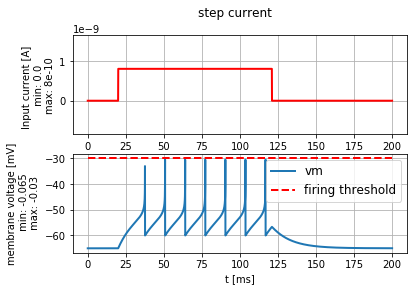

In [2]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=120, unit_time=b2.ms, amplitude=0.8*b2.namp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

## 3.1. Exercise: rehobase threshold
The goal of this exercise is to study the minimal current that can elicit a spike and to understand the different notions of a firing threshold. The Exponential-Integrate-and-Fire neuron model has two threshold related parameters. They correspond to the named parameters ‘v_spike’ and ‘v_rheobase’ in the function `simulate_exponential_IF_neuron().`

### 3.1.1. Question:
- Modify the code example given above: Call simulate_exponential_IF_neuron() and set the function parameter v_spike=+10mV (which overrides the default value -30mV). What do you expect to happen? How many spikes will be generated?
- Compute the minimal amplitude I_rh of a constant input current such that the neuron will elicit a spike. If you are not sure what and how to compute I_rh, have a look at Figure 5.1 and the textbox “Rheobase threshold and interpretation of parameters” in the book.
- Validate your result: Modify the code given above and inject a current of amplitude I_rh and 300 ms duration into the expIF neuron.

1. Obviously, spike threshold doesn't affect spike, even if i set the spike threshold to 100 mv.

nr of spikes: 7


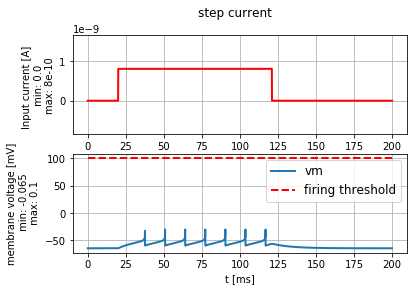

In [3]:
v_spike = 100 * b2.mV
plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

2. Differential equation for the exponential integrate-and-fire model: 

$$
\tau \frac{\mathrm{d}}{\mathrm{d}t}u = -(u - u_\text{rest}) + \Delta_T \exp \left( \frac{u - \theta_\text{rh}}{\Delta_T} \right) + RI
$$

For $\Delta_T \rightarrow 0$ (ie. we have a very 'sharp' increase after the potential is above the rheobase threhsold, we can approximate the equation as a linear passive membrane model:

$$
\tau \frac{\mathrm{d}}{\mathrm{d}t}u = -(u - u_\text{rest}) + RI = 0
$$

The voltage at the bifurcation point can be determined from the condition df/du=0 to lie at u=ϑ_rh.

$$
I_\text{rh} = \frac{\theta_\text{rh} - u_\text{rest}}{R}
$$

In [4]:
I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST) / exp_IF.MEMBRANE_RESISTANCE_R
I_rh

0.5 * namp

3. 

nr of spikes: 2


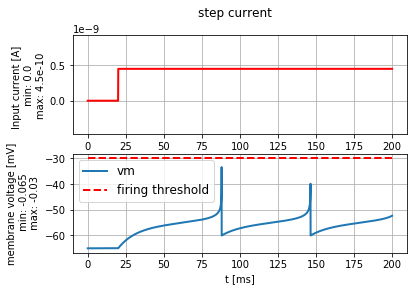

In [5]:
input_current = input_factory.get_step_current(
    t_start=20, t_end=320, unit_time=b2.ms, amplitude=I_rh*0.9)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(
    I_stim=input_current, simulation_time=200*b2.ms)

plot_tools.plot_voltage_and_current_traces(
    state_monitor, input_current,title="step current",
    firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike)
print("nr of spikes: {}".format(spike_monitor.count[0]))

But why rh*.9 also can elicit a spike? Now we don't use approximation and ecalculate by below equation, where df/du=0, u=ϑ_rh.
$$
\tau \frac{\mathrm{d}}{\mathrm{d}t}u = -(u - u_\text{rest}) + \Delta_T \exp \left( \frac{u - \theta_\text{rh}}{\Delta_T} \right) + RI = 0
$$

In [6]:
I_rh = (exp_IF.RHEOBASE_THRESHOLD_v_rh - exp_IF.V_REST - exp_IF.SHARPNESS_delta_T * 1) / exp_IF.MEMBRANE_RESISTANCE_R
I_rh

0.4 * namp

Because we don't have infinite time, it shouldn't generate any spike.

## 3.2. Exercise: strength-duration curve
The minimal amplitude to elicit a spike depends on the duration of the current. For an infinitely long current, we’ve just calculated the rheobase current. For short pulses and step currents, we can “experimentally” determine the minimal currents. If we plot the amplitude versus duration, we get the strength-duration curve

### 3.2.1. Question:
Have a look at the following code: for the values i = 0, 2 and 6 we did not provide the minimal amplitude, but the entries in min_amp[i] are set to 0. Complete the min_amp list.

- Set the index i to 0
- Enter an informed guess into the min_amp table
- Run the script
- Depending on the plot, increase or decrease the amplitude, repeat until you just get one spike.
- Do the same for i = 2 and i = 6
At the end of the script, the strength-duration curve is plotted. Discuss it. You may want to add a log-log plot to better see the asymptotic behaviour.

nr of spikes: 1


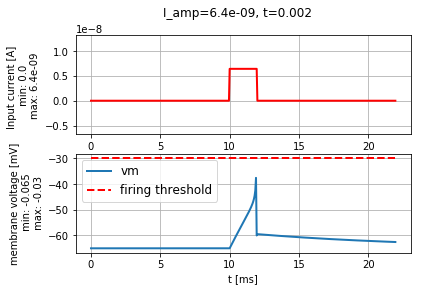

In [7]:
i = 1 #change i and find the value that goes into min_amp
durations = [1,  2,  5, 10, 20, 50, 100]
min_amp = [0., 4.42, 0., 1.10, .70, .48, 0.]


min_amp[i] = 6.4

t = durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1


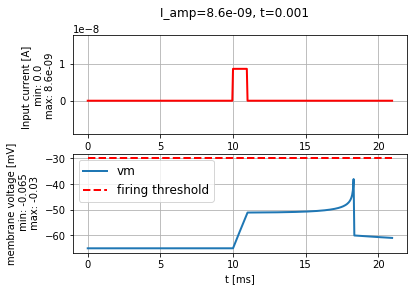

In [8]:
i = 0
min_amp[i] = 8.6

t = durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1


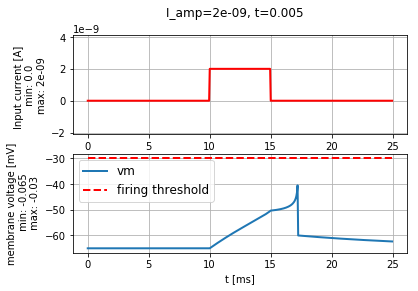

In [9]:
i = 2
min_amp[i] = 2

t = durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

nr of spikes: 1


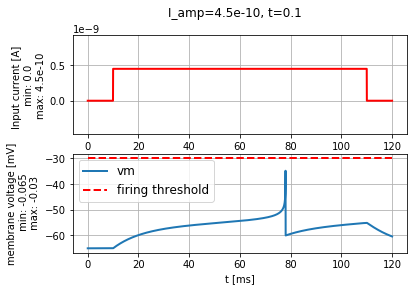

In [10]:
i = 6
min_amp[i] = 0.45

t = durations[i]
I_amp = min_amp[i]*b2.namp
title_txt = "I_amp={}, t={}".format(I_amp, t*b2.ms)

input_current = input_factory.get_step_current(t_start=10, t_end=10+t-1, unit_time=b2.ms, amplitude=I_amp)

state_monitor, spike_monitor = exp_IF.simulate_exponential_IF_neuron(I_stim=input_current, simulation_time=(t+20)*b2.ms)

plot_tools.plot_voltage_and_current_traces(state_monitor, input_current,
                                           title=title_txt, firing_threshold=exp_IF.FIRING_THRESHOLD_v_spike,
                                          legend_location=2)
print("nr of spikes: {}".format(spike_monitor.count[0]))

In [11]:
min_amp

[8.6, 6.4, 2, 1.1, 0.7, 0.48, 0.45]

Text(0.5,0,'t [ms]')

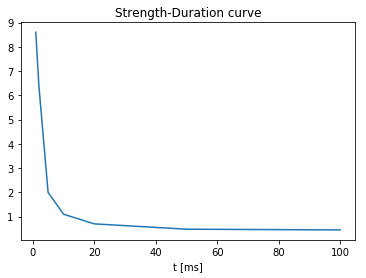

In [12]:
plt.plot(durations, min_amp)
plt.title("Strength-Duration curve")
plt.xlabel("t [ms]")

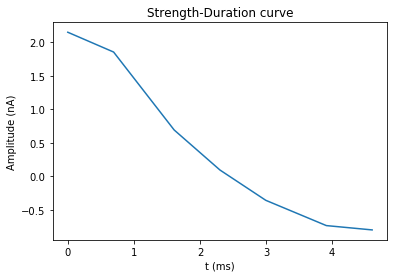

In [14]:
import numpy as np
plt.plot(np.log(durations), np.log(min_amp))
plt.xlabel('t (ms)')
plt.ylabel('Amplitude (nA)')
plt.title("Strength-Duration curve")
plt.show()